In [130]:
#import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro,levene,kruskal,f_oneway,ttest_ind,chi2,chi2_contingency,pearsonr,ttest_rel,ttest_ind
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings('ignore')

In [131]:
plt.close('all')     #to close all running pyplot windows

In [132]:
#load dataset
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bike_sharing.csv")
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [133]:
#shape of data->(rows,columns)
data.shape

(10886, 12)

In [134]:
#check what type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [135]:
#check missing values
data.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [136]:
#check duplicate values
data.duplicated().sum()

np.int64(0)

In [137]:
#Concise summary of data
data.describe(include='all')


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [138]:
#check unique values in season
data.season.unique()

array([1, 2, 3, 4])

In [139]:
# season: season (1: spring, 2: summer, 3: fall, 4: winter)

#rename the each season category as per data

data['season'] = data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [140]:
#check unique values in weather
data.weather.unique()

array([1, 2, 3, 4])

In [141]:
''' weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'''

#rename the each weather category as per data

data['weather'] = data['weather'].map({1:'Clear', 2:'Mist', 3:'Light Rain', 4:'Heavy Rain'})
data['weather'].unique()

array(['Clear', 'Mist', 'Light Rain', 'Heavy Rain'], dtype=object)

In [142]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1


In [143]:
#check total counts of each season category
data.season.value_counts()

,count
season,
winter,2734
summer,2733
fall,2733
spring,2686


In [144]:
#check total counts of each weather category
data.weather.value_counts()

,count
weather,
Clear,7192
Mist,2834
Light Rain,859
Heavy Rain,1


In [145]:
print(data.workingday.unique())
print(data.workingday.value_counts())

[0 1]
workingday
1    7412
0    3474
Name: count, dtype: int64


In [146]:
print(data.holiday.unique())
print(data.holiday.value_counts())

[0 1]
holiday
0    10575
1      311
Name: count, dtype: int64


In [147]:
# converting specific datatypes to categorical
data["datetime"]=pd.to_datetime(data["datetime"])
categorical=["season","holiday","workingday","weather"]
for i in categorical:
  data[i]=data[i].astype("category")

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [149]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

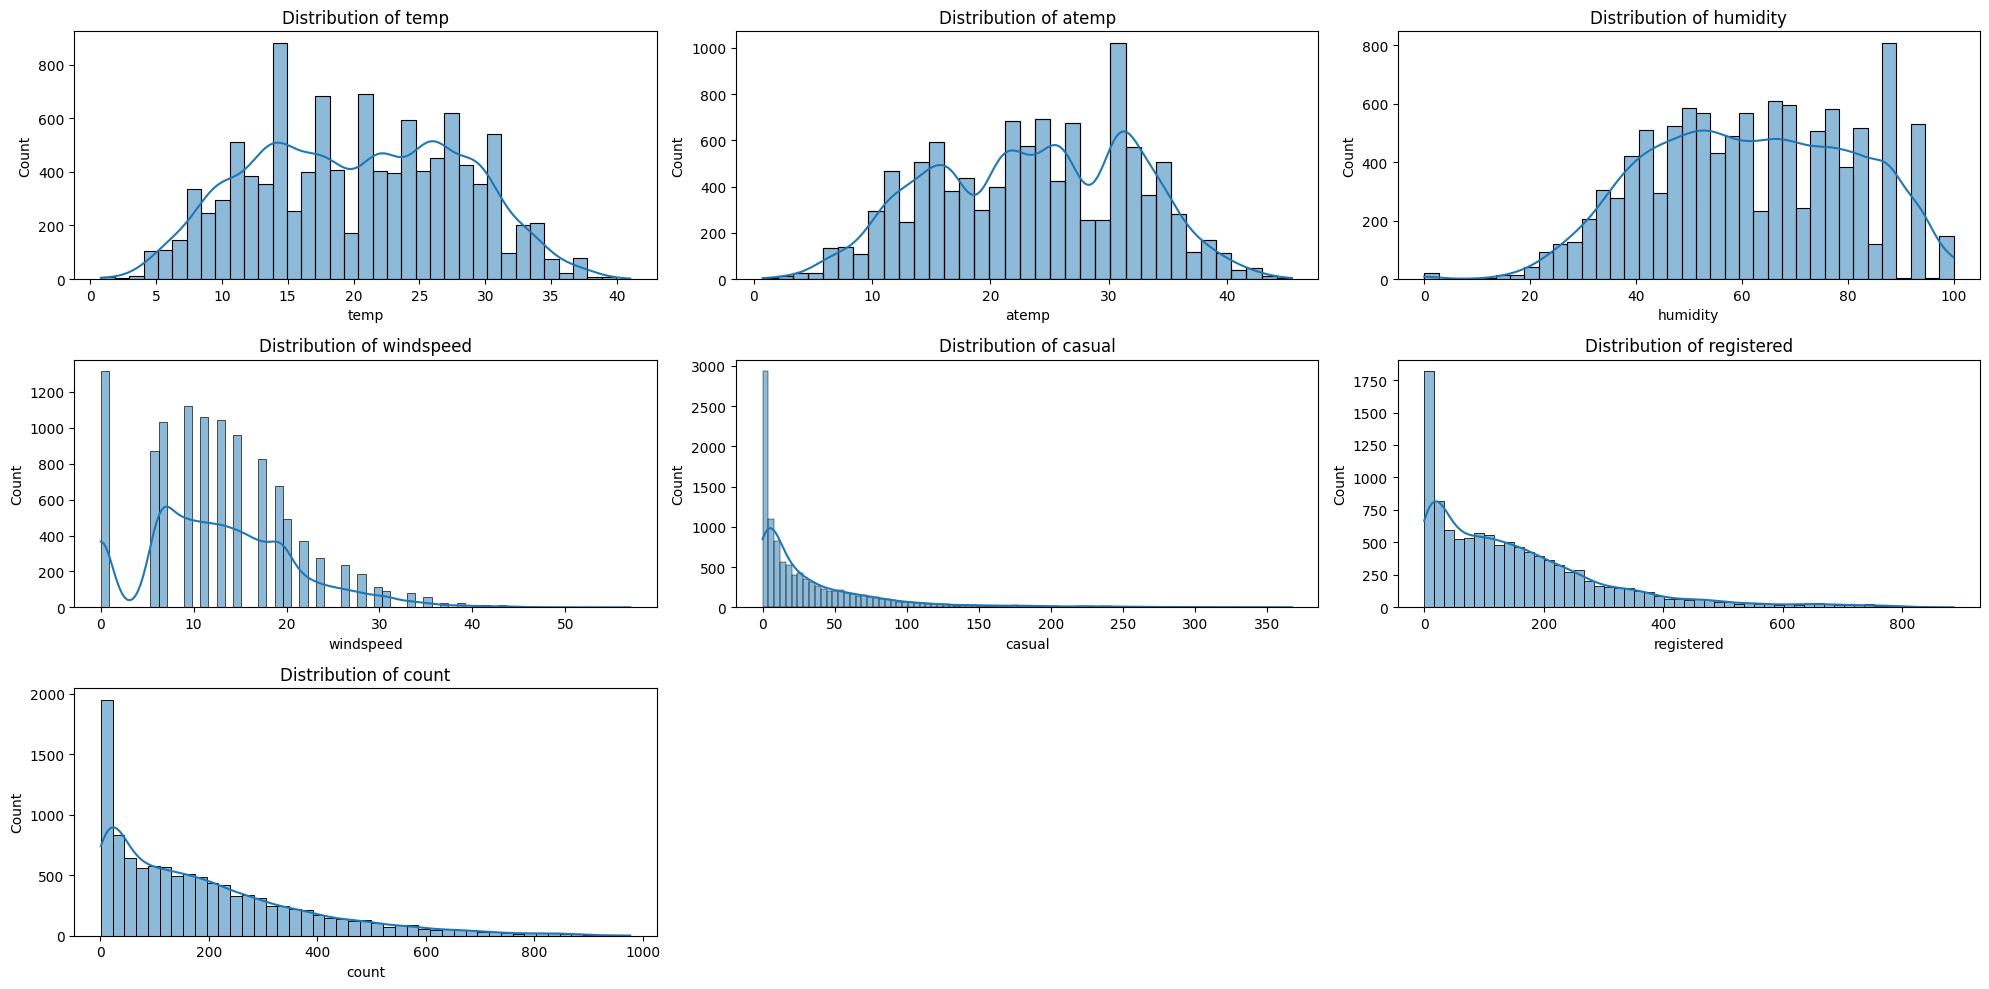

In [150]:
#numerical columns of data
num_cols=['temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

#define subplot size
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

#flatten the array
axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax=sns.histplot(data=data, x=col, kde=True, ax=axes[i])  #histplot of numerical columns
    axes[i].set_title(f'Distribution of {col}')



for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])    #remove graphs which are empty

plt.tight_layout()
plt.show()

Below 10 and above 30 degree tempertaure bike rentals count decreases

Most no of users use Bike rentals 10-30 degree celcius temperature

At temperature 14 degree celcius there are most no of users(~880)

Below 20 humidity least no of users of bike rentals, 40-85 humidity there are large no of users of bike rentals

At humidity around 85 there are most no of users(~807)

As windspeed increases no of users decreases

Large no of users around 8-20m/s windspeed who uses bike rentals



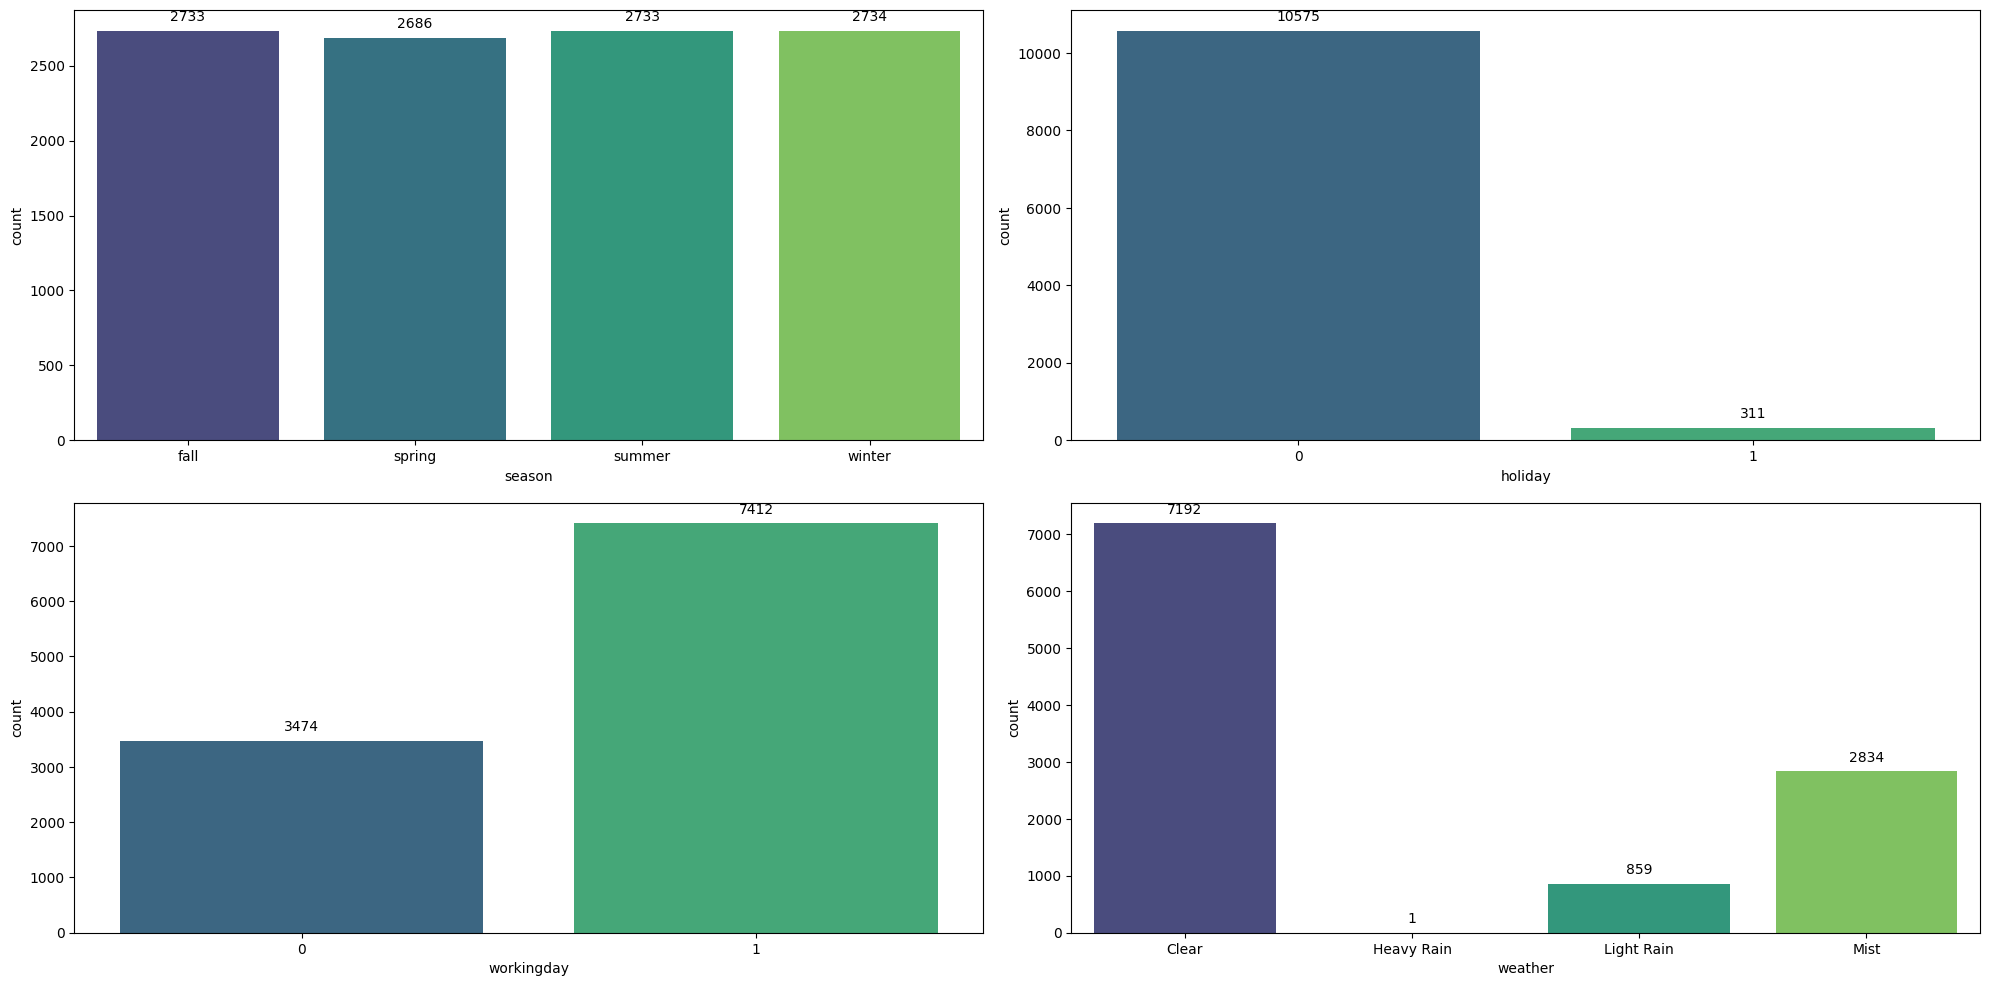

In [151]:
#categorical columns of data
cat_cols=['season', 'holiday', 'workingday', 'weather']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

for i, col in enumerate(cat_cols):
    ax=sns.countplot(data=data, x=col, ax=axes[i // 2, i % 2],palette='viridis')

    for i in ax.patches:
        ax.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()),va='center', ha='center', size=10, xytext=(0, 10), textcoords='offset points')



plt.tight_layout()
plt.show()

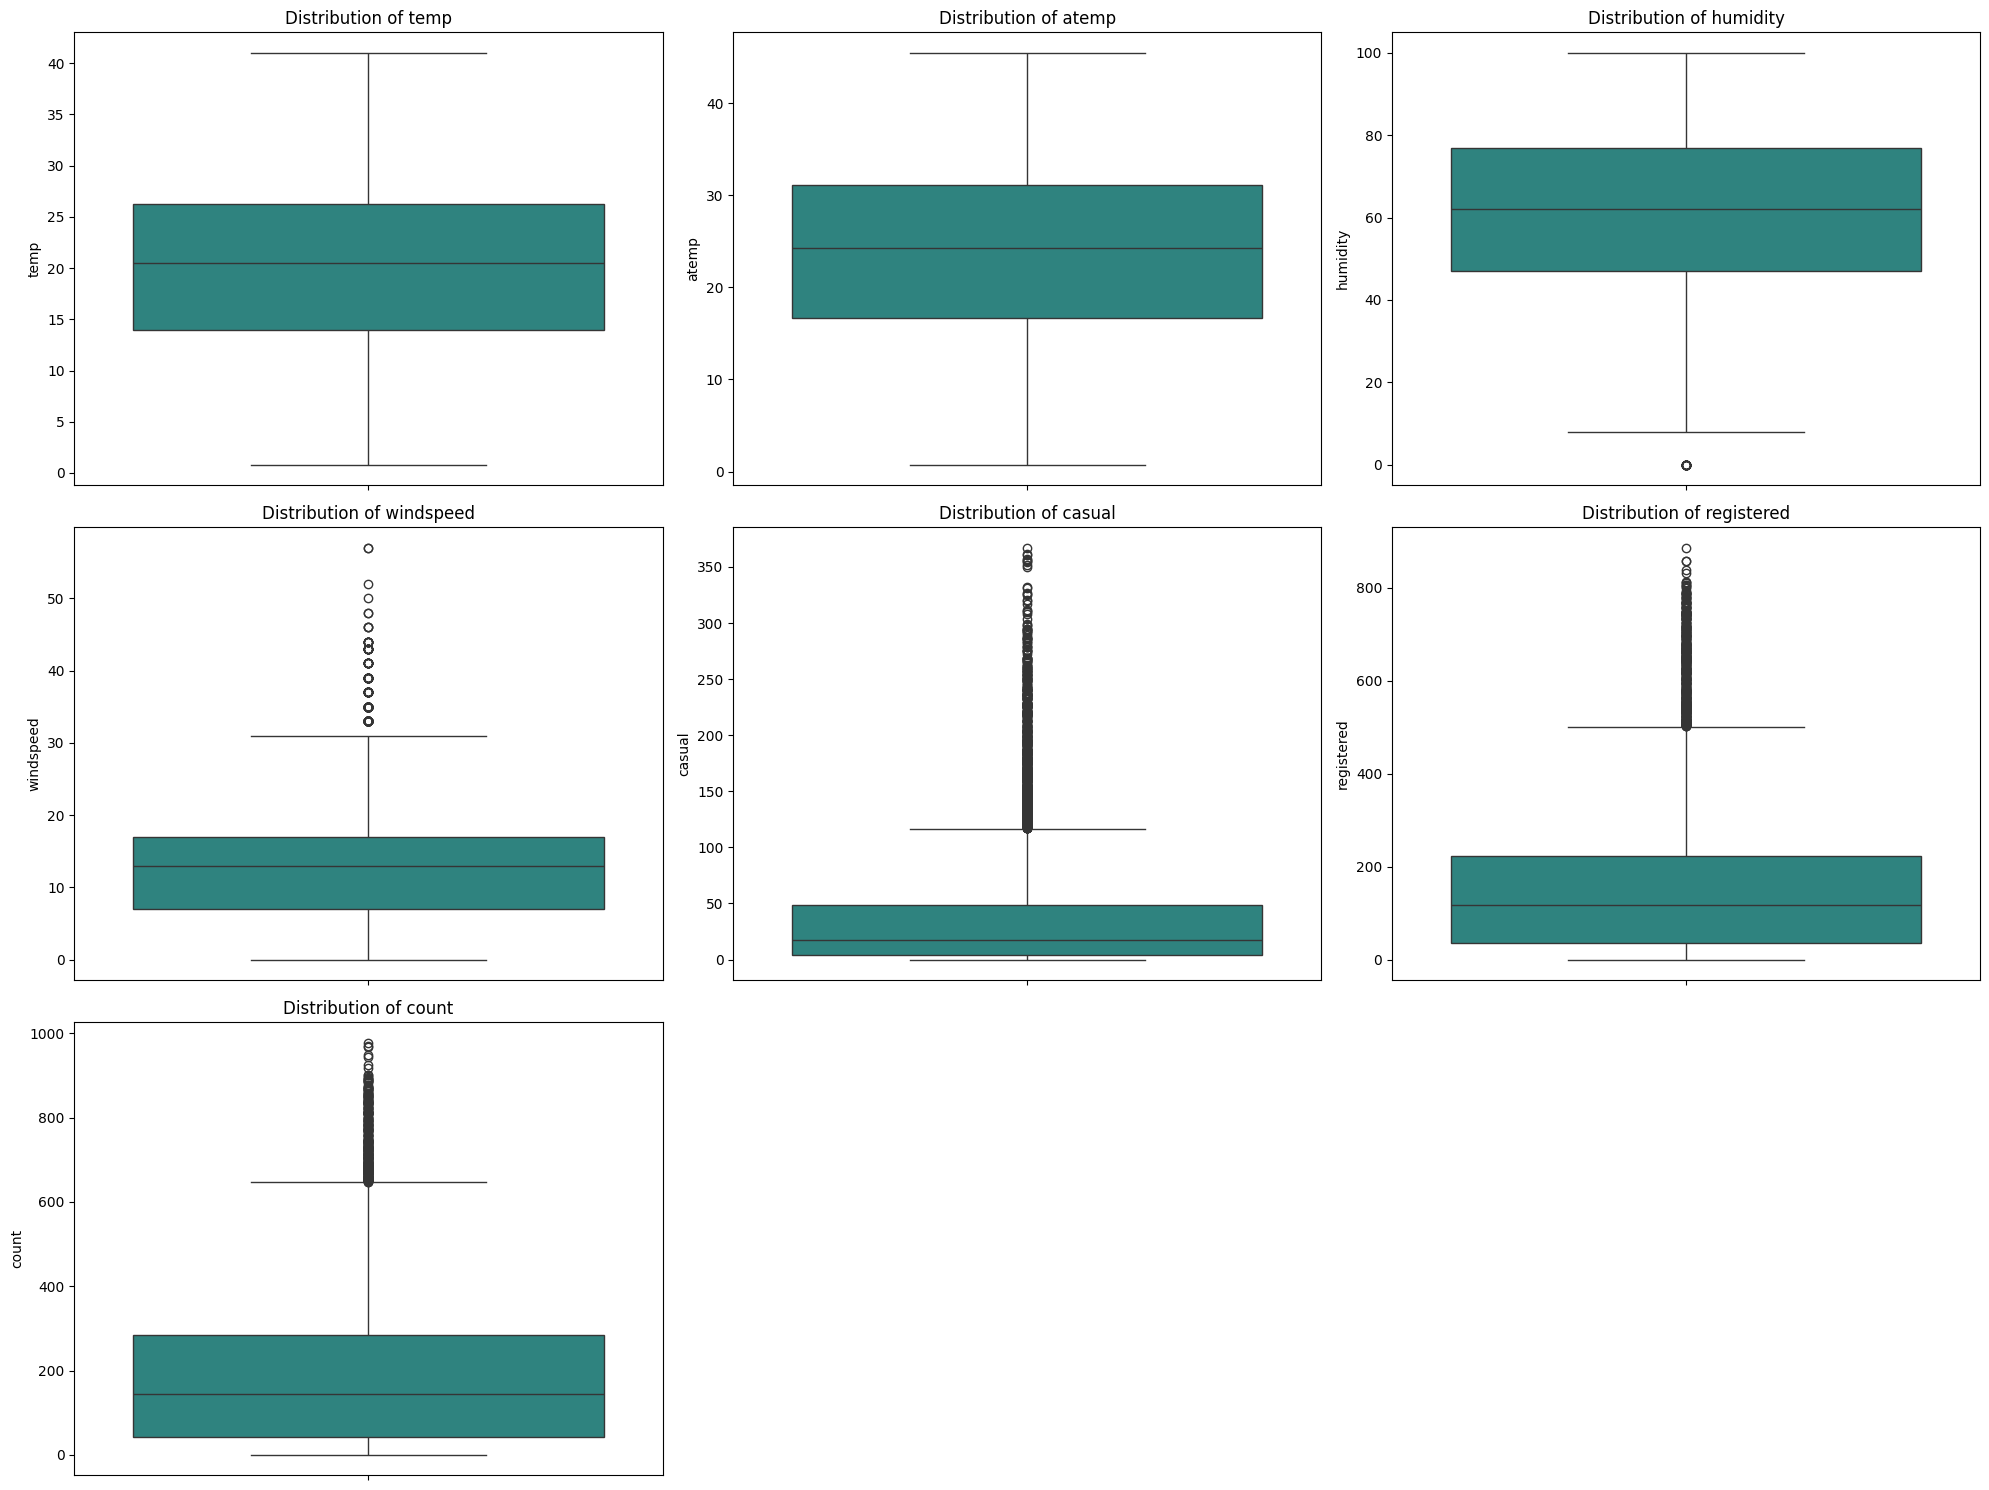

In [152]:
#define subplot size
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

#flatten the array
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=data, y=col, ax=axes[i],palette="viridis")  #boxplot of numerical columns
    axes[i].set_title(f'Distribution of {col}')

for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])    #remove axes not necessary or empty

plt.tight_layout()
plt.show()

windspeed,casual,registered,count have outliers

will not remove outliers it will cost loss of data

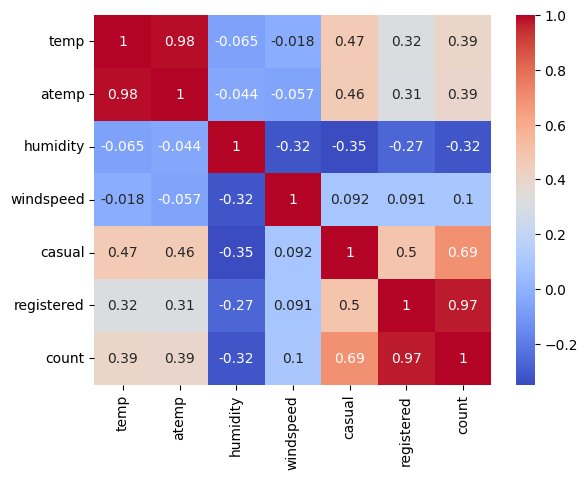

In [153]:
sns.heatmap(data[num_cols].corr(),annot=True,cmap='coolwarm')
plt.show()

temp and atemp are highly correlated(0.98) followed by registered and count(0.97)

windspeed and temp are least correlated which is nearly zero and slightly negative this implies no linear relationship b/w windspeed and temp

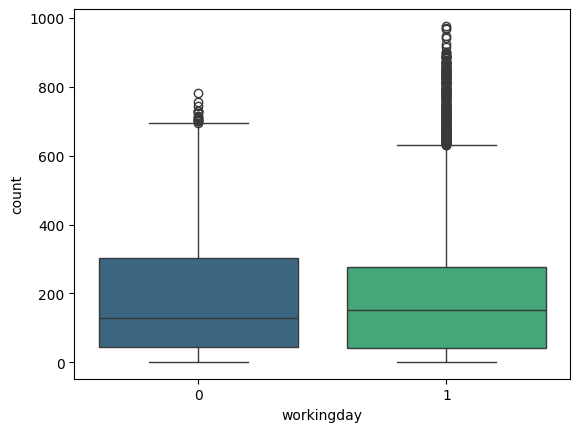

In [154]:
sns.boxplot(data=data,x='workingday',y='count',palette='viridis')
plt.show()

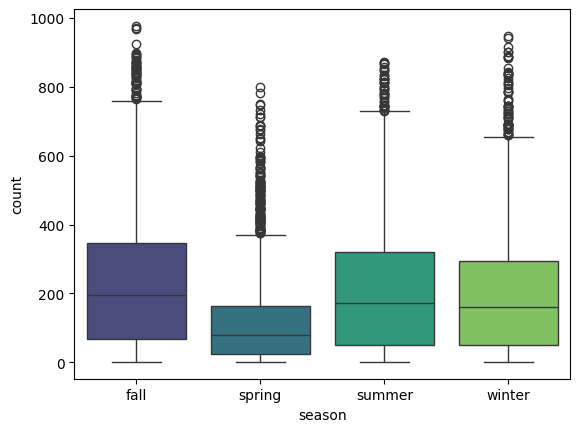

In [155]:
sns.boxplot(data=data,x='season',y='count',palette='viridis')
plt.show()

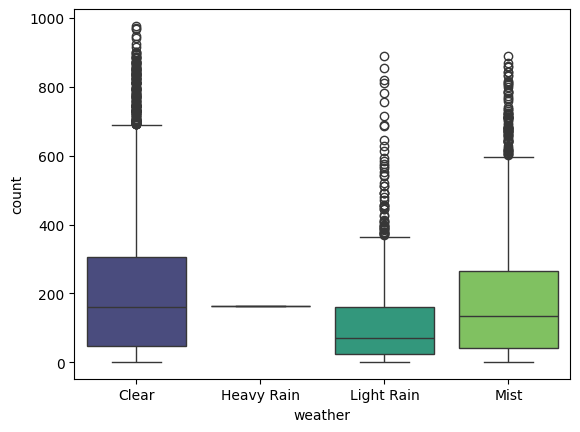

In [156]:
sns.boxplot(data=data,x='weather',y='count',palette='viridis')
plt.show()

# Hypothesis Testing

# Check effect of Weather on Bike Rentals

Ho: Weather has no effect on Bike Rentals

Ha: Weather has effect on Bike Rentals

As data we work on is Numerical VS >2 Categorical and how Rentals dependent on each weather category

Test Used: ANOVA

Alpha: 0.05

In [157]:
data.weather.value_counts()

,count
weather,
Clear,7192
Mist,2834
Light Rain,859
Heavy Rain,1


In [158]:
#remove heavy rain weather category as its count is only 1 which cannot be used for testing
data_w=data[~(data['weather']=='Heavy Rain')]
data_w.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1


In [159]:
data_clear=data[data['weather']=='Clear']['count']
data_mist=data[data['weather']=='Mist']['count']
data_light=data[data['weather']=='Light Rain']['count']

As ANOVA Test using so for Normality and for equal variance(Levene's Test) these should be tested

ANOVA Feasibily Check

In [160]:
#for Normality, Shapiro Wilk Test

stats_clear,p_clear=shapiro(data_clear)
stats_mist,p_mist=shapiro(data_mist)
stats_light,p_light=shapiro(data_light)
print(f"Clear Weather: {stats_clear,p_clear}")
print(f"Mist Weather: {stats_mist,p_mist}")
print(f"Light Weather: {stats_light,p_light}")




Clear Weather: (np.float64(0.8909259459740138), np.float64(1.5964921477006555e-57))
Mist Weather: (np.float64(0.8767694973495206), np.float64(9.777839106111785e-43))
Light Weather: (np.float64(0.7674327906035717), np.float64(3.875893017396149e-33))


From above prob stats for Weather - clear,mist,light the p-value seems to very low for Shapiro wilk test, so none of the distributions are normal which denies first assumption of ANOVA.

In [161]:
#Check Equal Variance,Levene's Test

stats,p=levene(data_clear,data_mist,data_light)
print(f"Levene's Test: {stats,p}")

if p<0.05:
  print("Reject Null Hypothesis, Variance not same")
else:
  print("Accept Null Hypothesis, Variance same")

Levene's Test: (np.float64(81.67574924435011), np.float64(6.198278710731511e-36))
Reject Null Hypothesis, Variance not same


Another prerequisites of ANOVA of same variance among these weather distributions are not satisfied, levenes test reject null hypothesis indicates having different variance. So, we go with Kruskal test

In [162]:
#Kruskal Test

from scipy.stats import kruskal

stats,p=kruskal(data_clear,data_mist,data_light)
print(f"Kruskal Test: {stats,p}")

if p<0.05:
  print("Reject Null Hypothesis, Weather has effect on Bike Rentals")
else:
  print("Accept Null Hypothesis, Weather has no effect on Bike Rentals")

Kruskal Test: (np.float64(204.95566833068537), np.float64(3.122066178659941e-45))
Reject Null Hypothesis, Weather has effect on Bike Rentals


From above result we conclude we don't have enough evidence that weather impact bike rentals

Visual Check for Normal Distribution

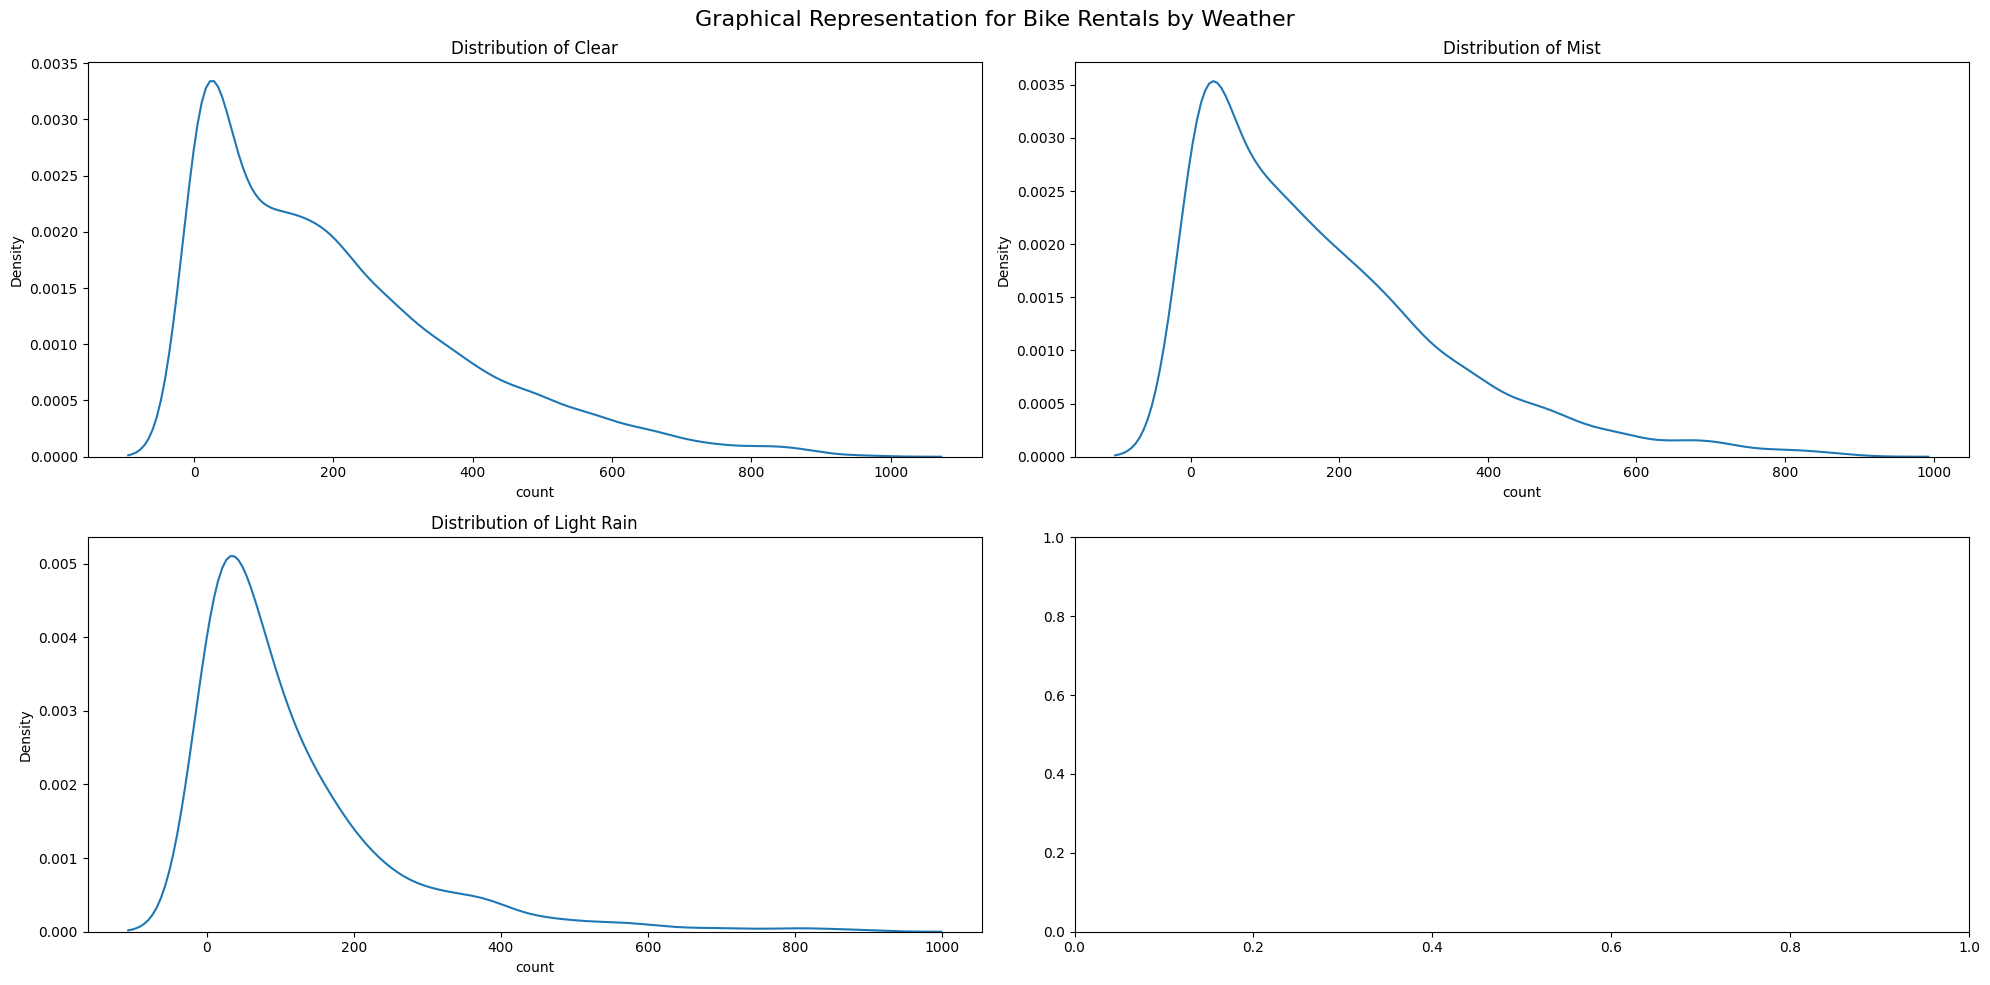

In [163]:

data_cat=[data_clear,data_mist,data_light]

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,10))

for i, col in enumerate(data_cat):
    sns.kdeplot(data=data, x=col, ax=axes[i // 2, i % 2],palette='viridis')
    axes[i // 2, i % 2].set_title(f'Distribution of {["Clear", "Mist", "Light Rain"][i]}')

for i in range(len(data_cat), len(axes)):
    fig.delaxes(axes[i // 2, i % 2])

plt.suptitle('Graphical Representation for Bike Rentals by Weather', fontsize=16)

plt.tight_layout()
plt.show()


Weather conditions clearly have a significant impact on the number of bike rentals.

Clear weather supports the widest range of rental counts, including the possibility of very high usage. The presence of multiple peaks suggests diverse usage patterns on clear days.

Misty conditions seem to have rental patterns fairly similar to clear weather for the most common, lower rental counts. However, the potential for very high usage or sustained moderate usage might be slightly diminished compared to clear days.

Light rain leads to a strong tendency for very low bike rental counts. The likelihood of moderate to high rentals is drastically reduced compared to clear or misty conditions.

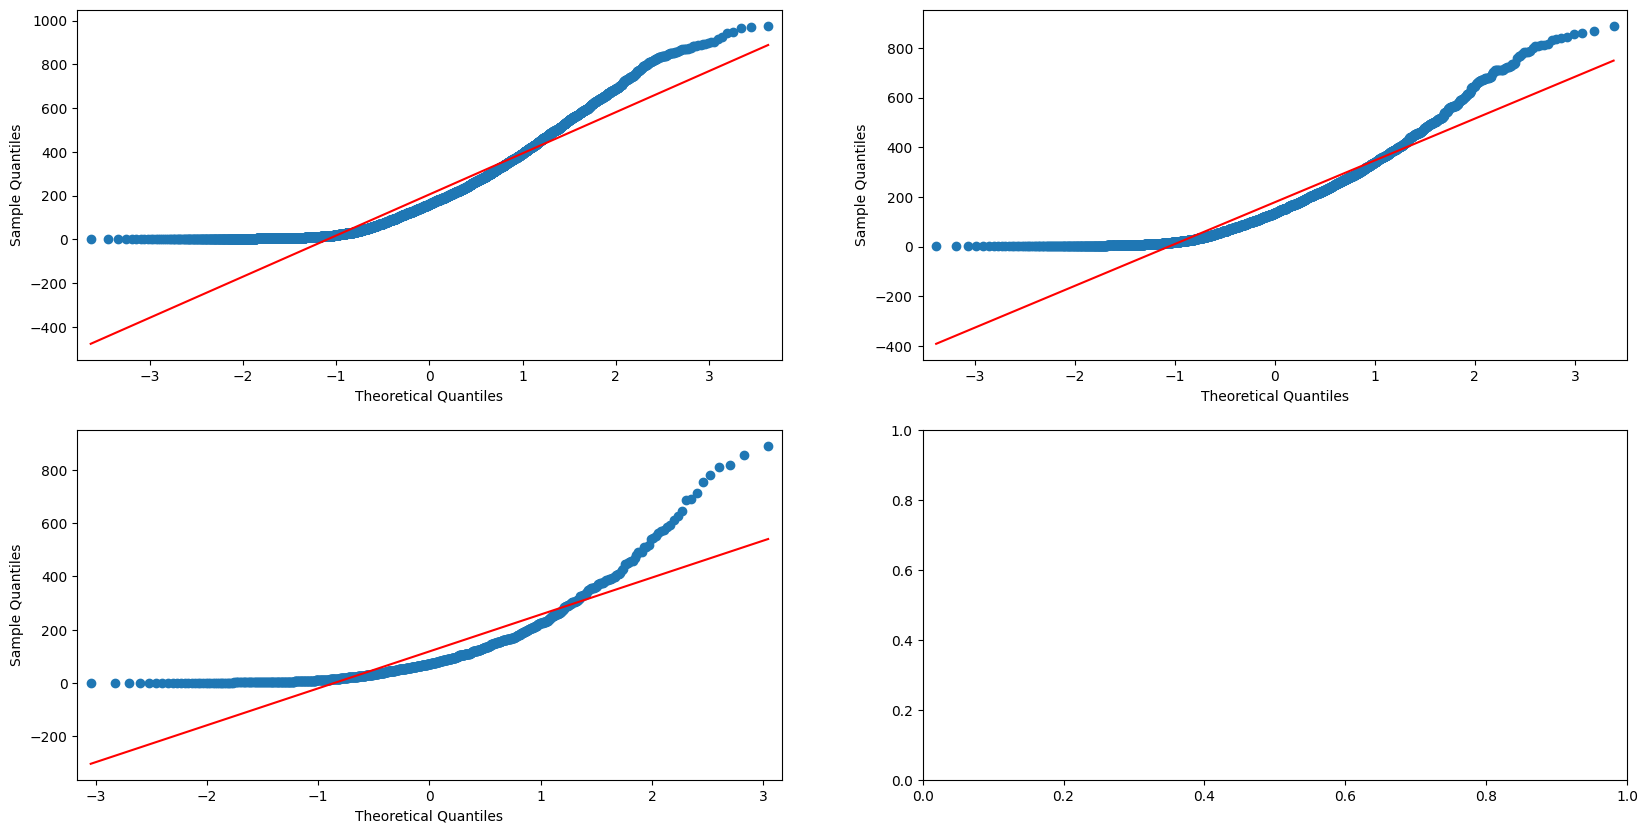

In [164]:
from statsmodels.graphics.gofplots import qqplot


fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,10))

qqplot(data_clear,line='s',ax=axes[0,0])
qqplot(data_mist,line='s',ax=axes[0,1])
qqplot(data_light,line='s',ax=axes[1,0])

plt.show()

from above qqplot shows no any (clear,mist,light rain) conditions follow Normal Distribution as these are being diverted from red line of normal distribution

In [165]:
#ANOVA

f_stat, p_value = f_oneway(data_clear, data_mist, data_light)

print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis: Weather has effect on bike rentals")
else:
    print("Fail to reject null hypothesis: Weather has no effect on bike rentals")

F-statistic: 98.28356881946706
p-value: 4.976448509904196e-43
Reject null hypothesis: Weather has effect on bike rentals


ANOVA Test also has similar results as Kruskals test

# Check effect of Season on Bike Rentals

Ho: Season has no effect on Bike Rentals

Ha: Season has effect on Bike Rentals

As data we work on is Numerical VS >2 Categorical and how Rentals dependent on each season category

Test Used: ANOVA

Alpha: 0.05

In [166]:
data.season.value_counts()

,count
season,
winter,2734
fall,2733
summer,2733
spring,2686


In [167]:
data_winter=data[data['season']=='winter']['count']
data_spring=data[data['season']=='spring']['count']
data_summer=data[data['season']=='summer']['count']
data_fall=data[data['season']=='fall']['count']

In [168]:
#for Normality, Shapiro Wilk

stats_winter,p_winter=shapiro(data_winter)
stats_spring,p_spring=shapiro(data_spring)
stats_summer,p_summer=shapiro(data_summer)
stats_fall,p_fall=shapiro(data_fall)
print(f"Winter Weather: {stats_winter,p_winter}")
print(f"Spring Weather: {stats_spring,p_spring}")
print(f"Summer Weather: {stats_summer,p_summer}")
print(f"Fall Weather: {stats_fall,p_fall}")


Winter Weather: (np.float64(0.8954637482095505), np.float64(1.1299244409282836e-39))
Spring Weather: (np.float64(0.8087378401253588), np.float64(8.749584618867662e-49))
Summer Weather: (np.float64(0.9004818080893252), np.float64(6.039374406270491e-39))
Fall Weather: (np.float64(0.9148166372899196), np.float64(1.043680518918597e-36))


From above prob stats for Weather - winter,spring,summer,fall the p-value seems to very low for Shapiro wilk test, so none of the distributions are normal which denies first assumption of ANOVA.

In [169]:
#Check Equal Variance

stats,p=levene(data_winter,data_spring,data_summer,data_fall)
print(f"Levene's Test: {stats,p}")

if p<0.05:
  print("Reject Null Hypothesis, Variance not same")
else:
  print("Accept Null Hypothesis, Variance same")

Levene's Test: (np.float64(187.7706624026276), np.float64(1.0147116860043298e-118))
Reject Null Hypothesis, Variance not same


Another prerequisites of ANOVA of same variance among these weather distributions are not satisfied, levenes test reject null hypothesis indicates having different variance. So, we go with Kruskal test

In [170]:
#Kruskal Test

stats,p=kruskal(data_clear,data_mist,data_light)
print(f"Kruskal Test: {stats,p}")

if p<0.05:
  print("Reject Null Hypothesis, Season has effect on Bike Rentals")
else:
  print("Accept Null Hypothesis, Season has no effect on Bike Rentals")

Kruskal Test: (np.float64(204.95566833068537), np.float64(3.122066178659941e-45))
Reject Null Hypothesis, Season has effect on Bike Rentals


From above result we conclude we don't have enough evidence that season impact bike rentals

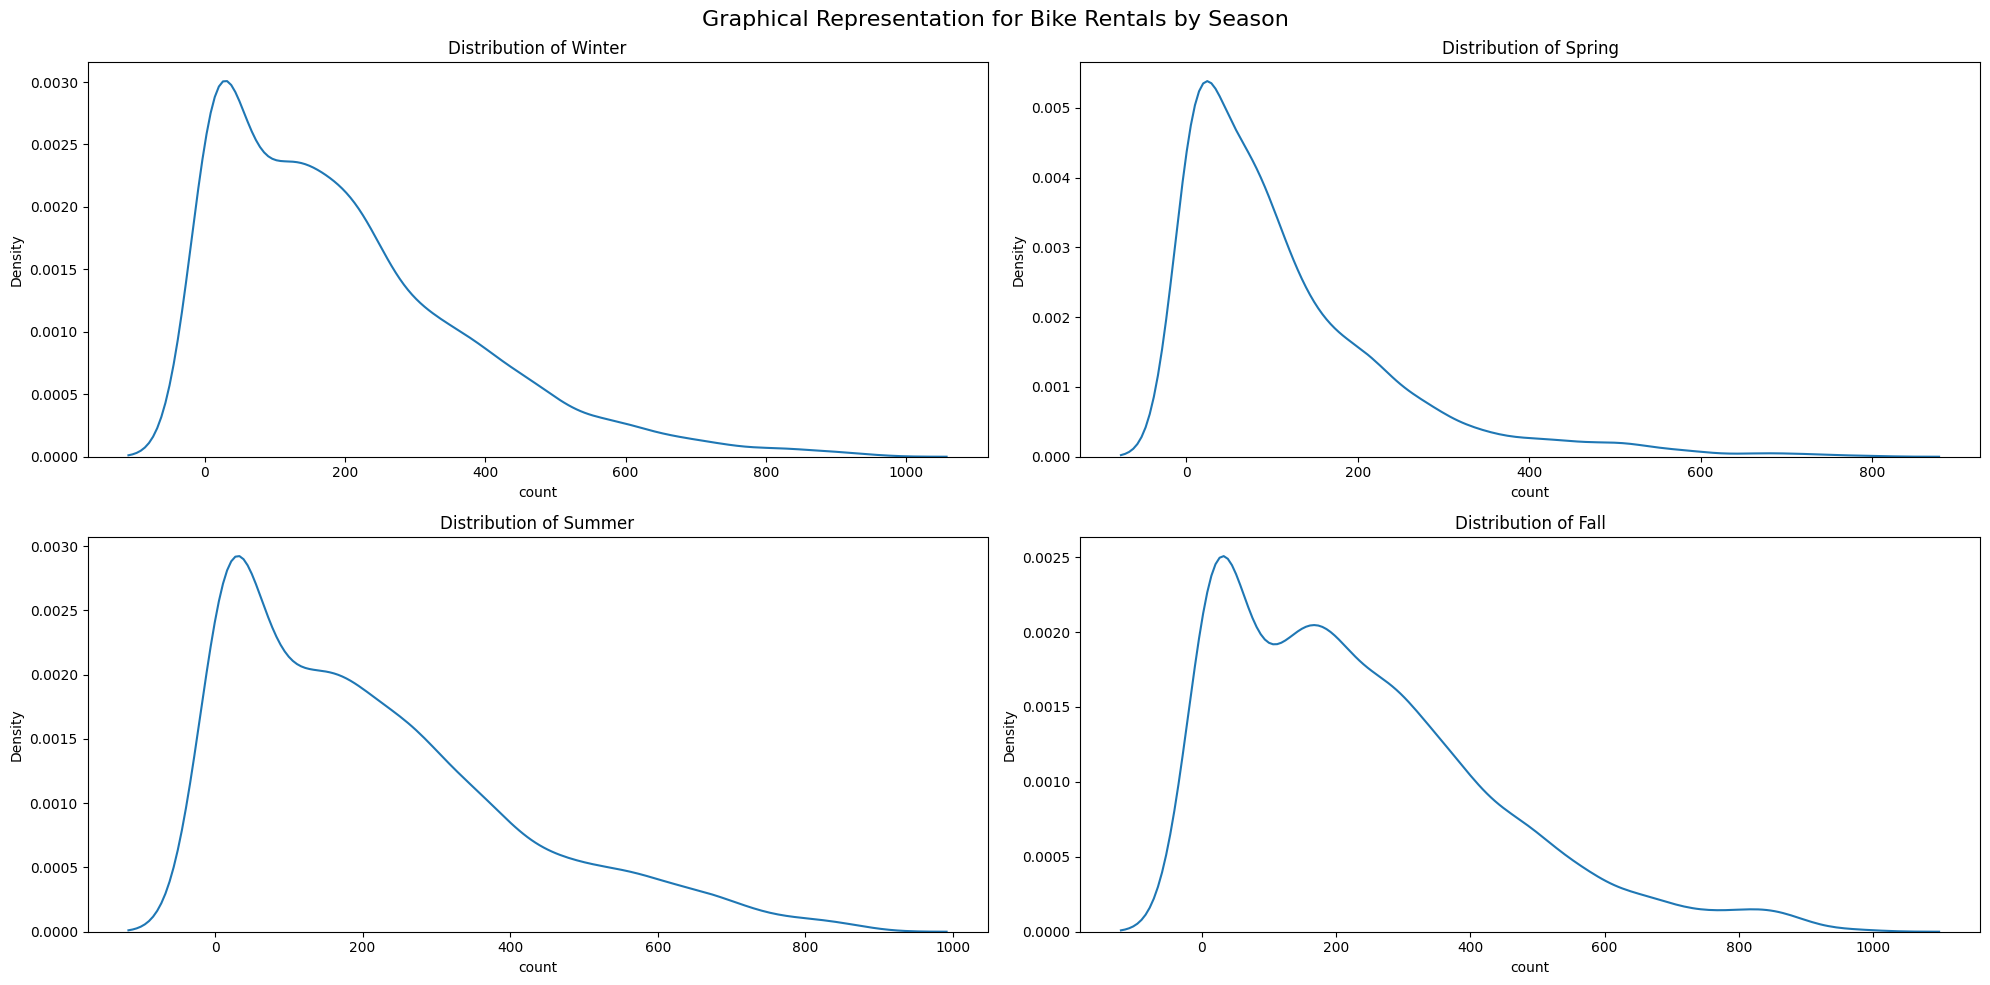

In [171]:

data_cat=[data_winter,data_spring,data_summer,data_fall]

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,10))

for i, col in enumerate(data_cat):
    sns.kdeplot(data=data, x=col, ax=axes[i // 2, i % 2],palette='viridis')
    axes[i // 2, i % 2].set_title(f'Distribution of {["Winter", "Spring", "Summer", "Fall"][i]}')

plt.suptitle('Graphical Representation for Bike Rentals by Season', fontsize=16)
plt.tight_layout()


plt.show()


Winter:
The distribution is right-skewed.

Most rentals are concentrated below 200.

There’s a long tail toward higher rental counts, indicating fewer high-usage days.

2. Spring:
Also right-skewed but with a sharper peak.

Rentals tend to be even lower than in summer or fall.

Indicates lower average demand in spring, possibly due to unstable weather.

3. Summer:
Slightly flatter distribution.

Rentals are more spread out, with a broader range of frequent usage.

This suggests higher and more consistent demand in summer.

4. Fall:
Similar to summer, but the tail is longer.

Multiple peaks may suggest varying usage patterns, perhaps due to weather transitions or school terms.



Summer and Fall show higher and more consistent rental activity compared to Winter and Spring.

All distributions are right-skewed, indicating that lower bike rental counts are more common, with occasional high-usage days.

This type of analysis can guide seasonal marketing strategies, bike inventory planning, and maintenance scheduling.

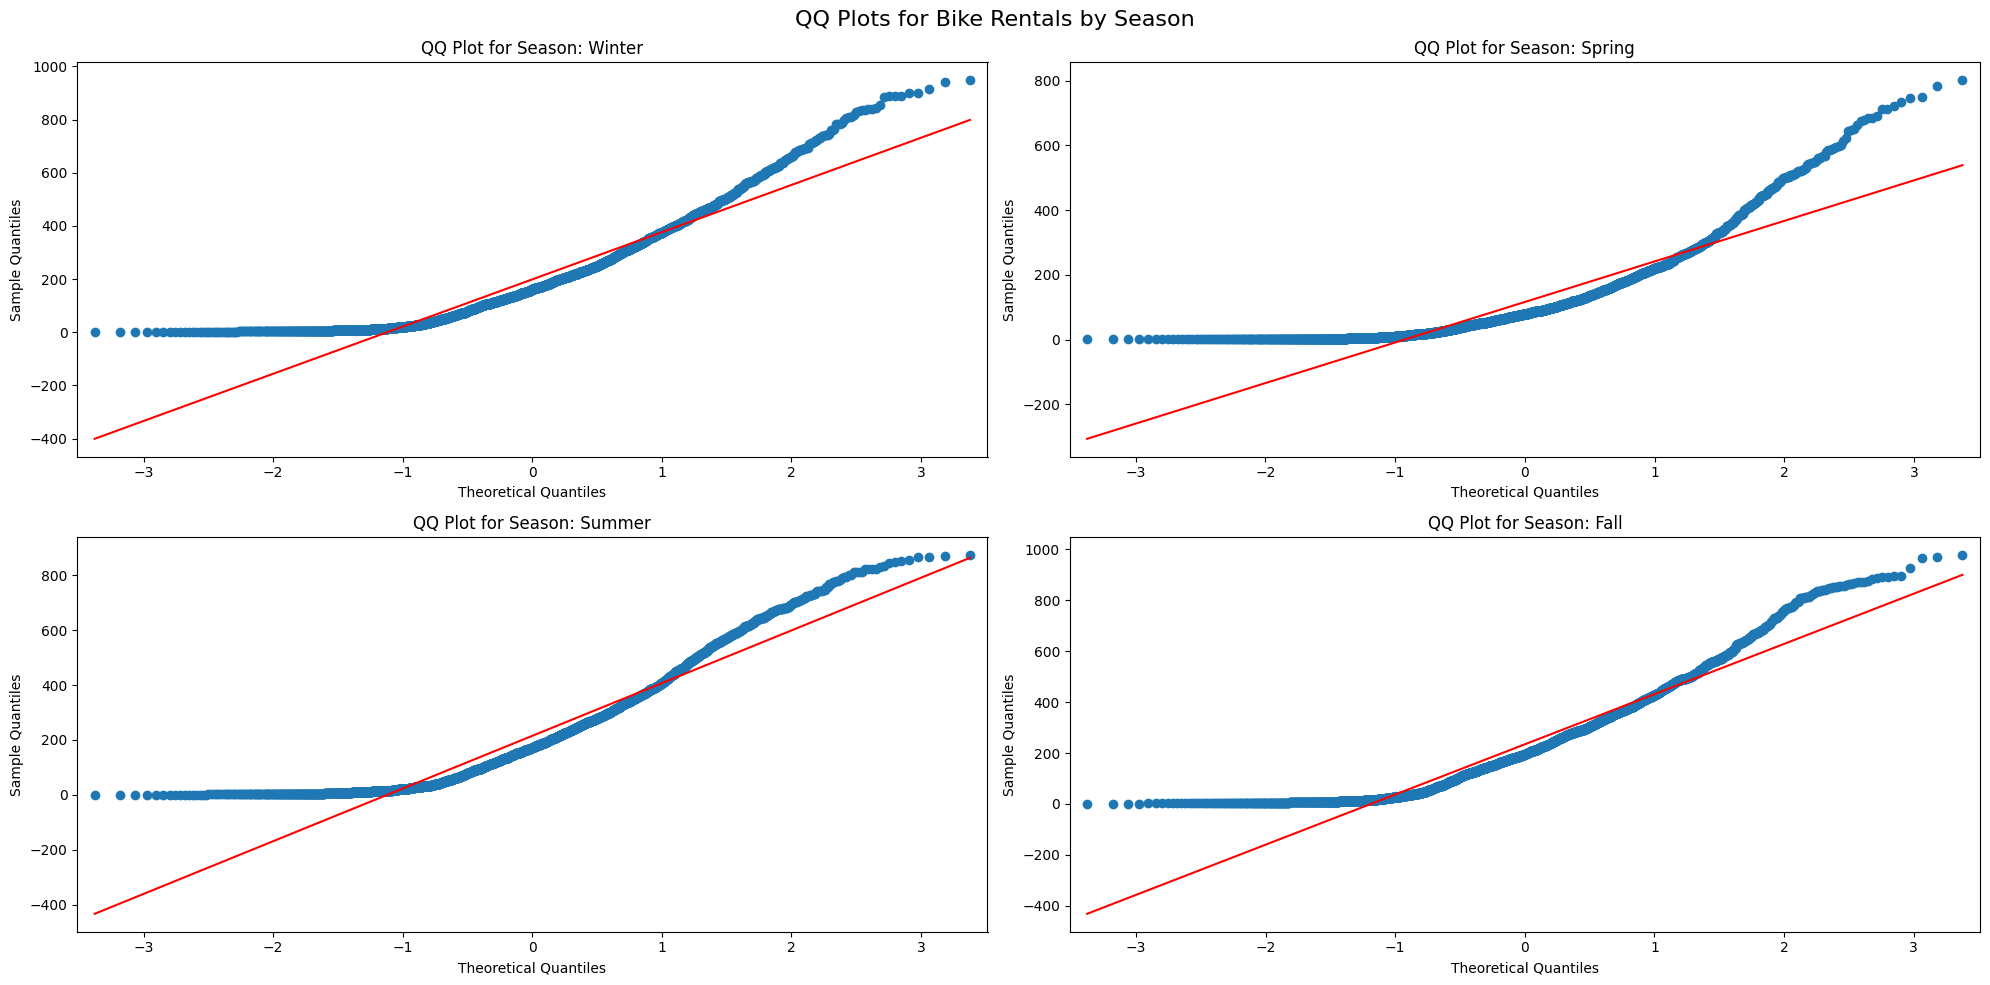

In [172]:
#QQ Plot
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,10))

for i, col in enumerate(data_cat):
    qqplot(col,line='s',ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'QQ Plot for Season: {["Winter", "Spring", "Summer", "Fall"][i]}')

plt.suptitle('QQ Plots for Bike Rentals by Season', fontsize=16)
plt.tight_layout()


plt.show()

Fall:

Best alignment with the red line.
Indicates that bike rentals in Fall are closest to a normal distribution among all seasons.

Summer:

Some curvature at the tails (especially the left), indicating mild deviation from normality.
Still relatively close to normal in the middle quantiles.

Winter and Spring:

Show strong deviation at both tails and flattened distributions.
Many values far from the red line.
Not normally distributed — possibly skewed or heavy-tailed distributions.

Fall is the most normally distributed season in terms of bike rentals.

Winter and Spring significantly deviate from normality

In [173]:
#ANOVA
f_stat, p_value = f_oneway(data_winter,data_spring,data_summer,data_fall)

print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis: Season has effect on bike rentals")
else:
    print("Fail to reject null hypothesis: Season has no effect on bike rentals")

F-statistic: 236.94671081032104
p-value: 6.164843386499654e-149
Reject null hypothesis: Season has effect on bike rentals


# Check effect of Working Day on Bike Rentals

Ho: Working Day has no impact on bike rentals

Ha: Working Day has impact on bike rentals

As data we work on is Numerical VS Categorical and how Rentals dependent on each category- (weekday,weekend)

Test Used: T-Test independence

Alpha: 0.05

In [174]:
data.workingday.value_counts()

,count
workingday,
1,7412
0,3474


In [175]:
#T-Test
t1=data[data['workingday']==1]['count']   #neither weekend nor holiday
t2=data[data['workingday']==0]['count']   #weekend or holiday

stats,p=ttest_ind(t1,t2,alternative='greater')
print(f"T-Test: {stats,p}")

if p<0.05:
  print("Reject Null Hypothesis, Working Day has impact on Bike Rentals")
else:
  print("Accept Null Hypothesis, Working Day has no impact on Bike Rentals")

T-Test: (np.float64(1.2096277376026694), np.float64(0.11322402113180674))
Accept Null Hypothesis, Working Day has no impact on Bike Rentals


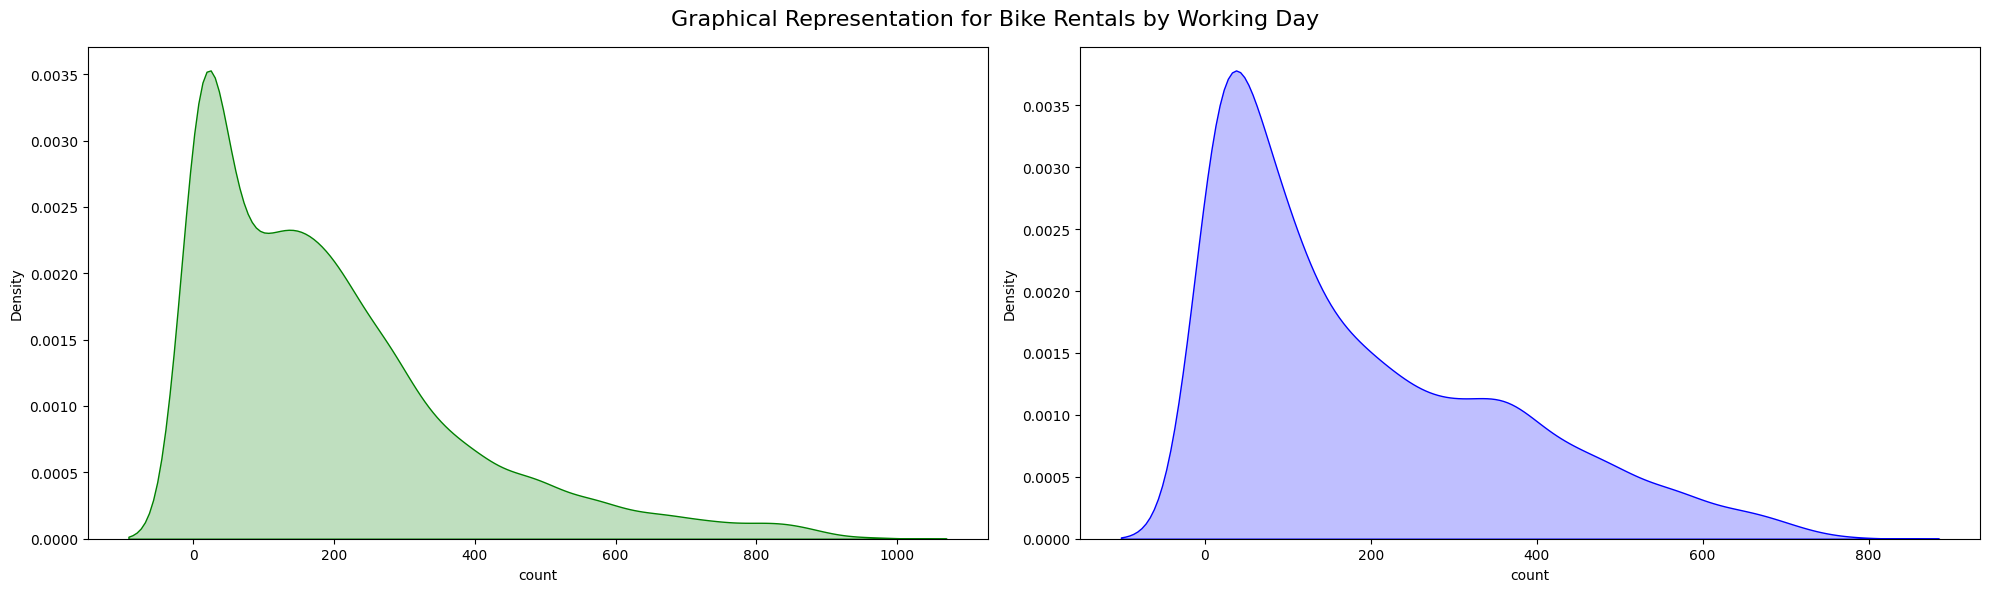

In [176]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
sns.kdeplot(data=data,x=t1,shade=True,color='green')

plt.subplot(1,2,2)
sns.kdeplot(data=data,x=t2,shade=True,color='blue')

plt.suptitle('Graphical Representation for Bike Rentals by Working Day', fontsize=16)
plt.tight_layout()
plt.show()

The most common number of bike rentals appears to be slightly higher on non-working days compared to the most common scenario on working days.

Non-working days seem to have a more consistently distributed range of rental counts, with a significant portion of days seeing moderate to fairly high usage. Working days, in contrast, are more often characterized by low usage, with occasional spikes to very high usage.

This visualization suggests that while the absolute highest rental counts might occasionally occur on working days, non-working days tend to have a more consistently higher baseline of bike rental activity.

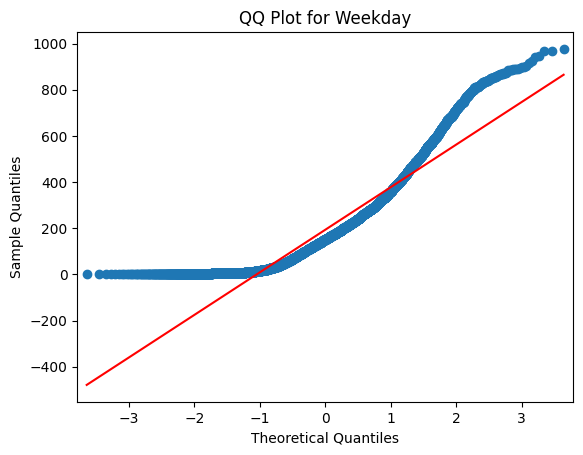

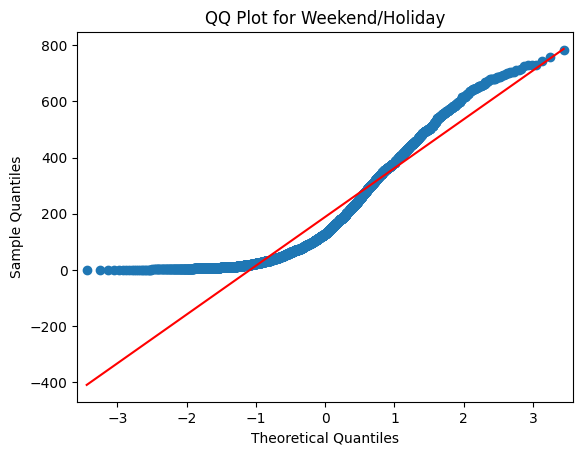

In [177]:
#QQ Plot
qqplot(t1,line='s')
plt.title('QQ Plot for Weekday')

qqplot(t2,line='s')
plt.title('QQ Plot for Weekend/Holiday')

plt.show()

# Effect of Weather on Season

Ho: Weather has no effect on Season

Ha: Weather has effect on Season

As data we work on is Categorical VS Categorical and how Rentals dependent on each weather category

Test Used: Chi-Sqaure Test

Alpha: 0.05

In [178]:
data_ws=pd.crosstab(data_w['weather'],data_w['season'])
data_ws

season,fall,spring,summer,winter
weather,,,,
Clear,1930,1759,1801,1702
Light Rain,199,211,224,225
Mist,604,715,708,807


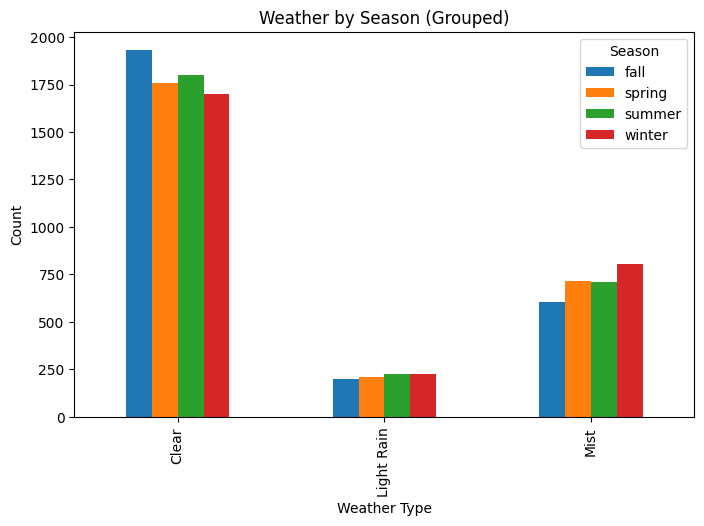

In [179]:
data_ws.plot(kind='bar', stacked=False, figsize=(8, 5))
plt.title("Weather by Season (Grouped)")
plt.xlabel("Weather Type")
plt.ylabel("Count")
plt.legend(title="Season")
plt.show()

Clear Weather:

Dominates all seasons.

Fall has the highest count of clear weather days, followed closely by Spring, Summer, and then Winter.

Indicates bike rentals are likely to be higher in Fall due to favorable weather.

Light Rain:

Very low and consistent across all seasons.

Roughly equal frequency (~200–250 days), showing minimal seasonal variation.

This might have less impact on seasonal bike rental differences.

Mist:

Most frequent in Winter, followed by Summer, Spring, and Fall.

Winter has noticeably more misty days, which may contribute to reduced visibility and safety concerns, possibly affecting rentals.



In [180]:
#Chi-Square Test

stats,p,dof,expected=chi2_contingency(data_ws)
print(f"Chi-Square Test: {stats,p,dof,expected}")

if p<0.05:
  print("Reject Null Hypothesis, Weather has effect on Season")
else:
  print("Accept Null Hypothesis, Weather has no effect on Season")

Chi-Square Test: (np.float64(46.101457310732485), np.float64(2.8260014509929403e-08), 6, array([[1805.76352779, 1774.04869086, 1805.76352779, 1806.42425356],
       [ 215.67726229,  211.8892972 ,  215.67726229,  215.75617823],
       [ 711.55920992,  699.06201194,  711.55920992,  711.81956821]]))
Reject Null Hypothesis, Weather has effect on Season


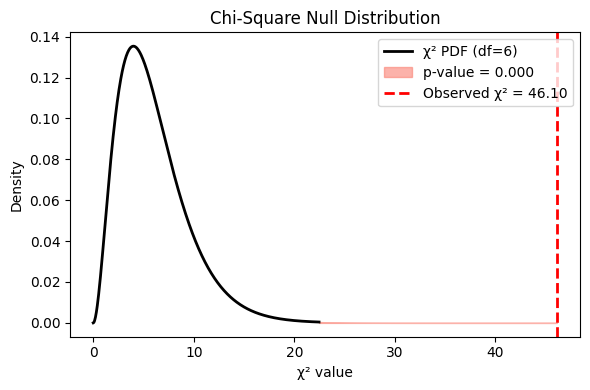

In [181]:
# Suppose these came from your chi2_contingency:
chi2_stat = stats        # your observed χ² statistic
dof       = dof          # degrees of freedom from the test
p_value   = p            # the p-value you printed

# 1. Build an x‐axis range for the χ² distribution
#    We’ll go from 0 up to, say, the 99.9th percentile of the null χ²
x_max = chi2.ppf(0.999, df=dof)
x = np.linspace(0, x_max, 500)

# 2. Compute the PDF values
pdf = chi2.pdf(x, df=dof)

# 3. Plot the null‐distribution curve
plt.figure(figsize=(6,4))
plt.plot(x, pdf, color='black', lw=2, label=f'χ² PDF (df={dof})')

# 4. Shade the area in the right‐tail beyond your observed statistic
x_shade = np.linspace(chi2_stat, x_max, 200)
plt.fill_between(x_shade, chi2.pdf(x_shade, df=dof),
                 color='salmon', alpha=0.6,
                 label=f'p-value = {p_value:.3f}')

# 5. Draw a vertical line at your observed χ²
plt.axvline(chi2_stat, color='red', linestyle='--', lw=2,
            label=f'Observed χ² = {chi2_stat:.2f}')

# 6. Labels and legend
plt.title('Chi-Square Null Distribution')
plt.xlabel('χ² value')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

The observed Chi-Square value of 46.10 falls very far into the right tail of the Chi-Square null distribution.

The area under the curve to the right of this value (the p-value) is extremely small, visually almost non-existent on this scale.

This graphically demonstrates how unlikely it is to get such a large Chi-Square value if the null hypothesis were true.

# Impact of Windspeed on Bike Rentals

Ho: Windspeed does not significantly impact bike rentals

Ha: Windspeed significantly impact bike rentals

As data we work on is Numerical VS Numerical and how Rentals dependent on windspeed

Alpha: 0.05

Appropriate Test: Pearson Correlation Test

In [182]:
#Pearson Correlation Test

stats,p=pearsonr(data['windspeed'],data['count'])
print(f"Pearson Correlation: {stats,p}")

if stats > 0:
    print("Positive correlation")
elif stats < 0:
    print("Negative correlation")
else:
    print("No correlation")

if p<0.05:
  print("Reject Null Hypothesis, Windspeed significantly impact bike rentals")
else:
  print("Accept Null Hypothesis, Windspeed does not significantly impact bike rentals")

Pearson Correlation: (np.float64(0.10136947021033277), np.float64(2.8984072031553694e-26))
Positive correlation
Reject Null Hypothesis, Windspeed significantly impact bike rentals


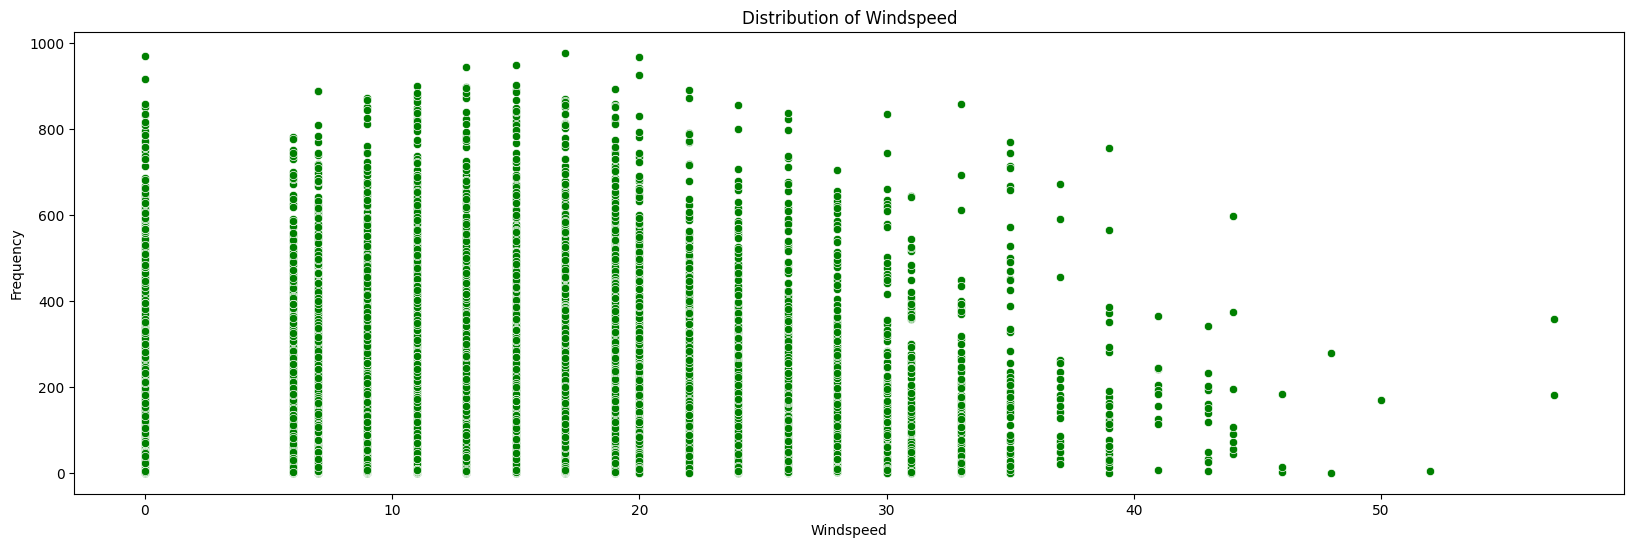

In [183]:
#Scatter Plot
plt.figure(figsize=(20, 6))

sns.scatterplot(data=data,x='windspeed',y='count',color='green')
plt.title('Distribution of Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.show()

There are hundreds of days with wind speeds of 0–10 m/s (you can see very tall vertical stacks of dots at those values).

As you move right, the vertical stacks get shorter—fewer days of high winds.

Above ~40 m/s, you see only a handful of dots: extreme windy days are rare.

The bulk of the mass is on the left (low speeds) with a long tail to the right (high speeds) as it is Right Tailed distribution

# Impact of Working Day on Registered Bike Rentals

Ho: Working Day has no impact on Registered Bike Rentals

Ha: Working Day has impact on Registered Bike Rentals

As data we work on is Numerical VS Categorical and how Registered Rentals dependent on each category- (weekday,weekend)

Alpha: 0.05

Test USed: T-Test Independence

T-Test: (np.float64(12.552707000266874), np.float64(3.403246859958037e-36))
Reject Null Hypothesis, Working and Non-Working Day has impact on Registered Bike Rentals
**********************************************************************************************************************************************************************************************************************************************************
**********************************************************************************************************************************************************************************************************************************************************


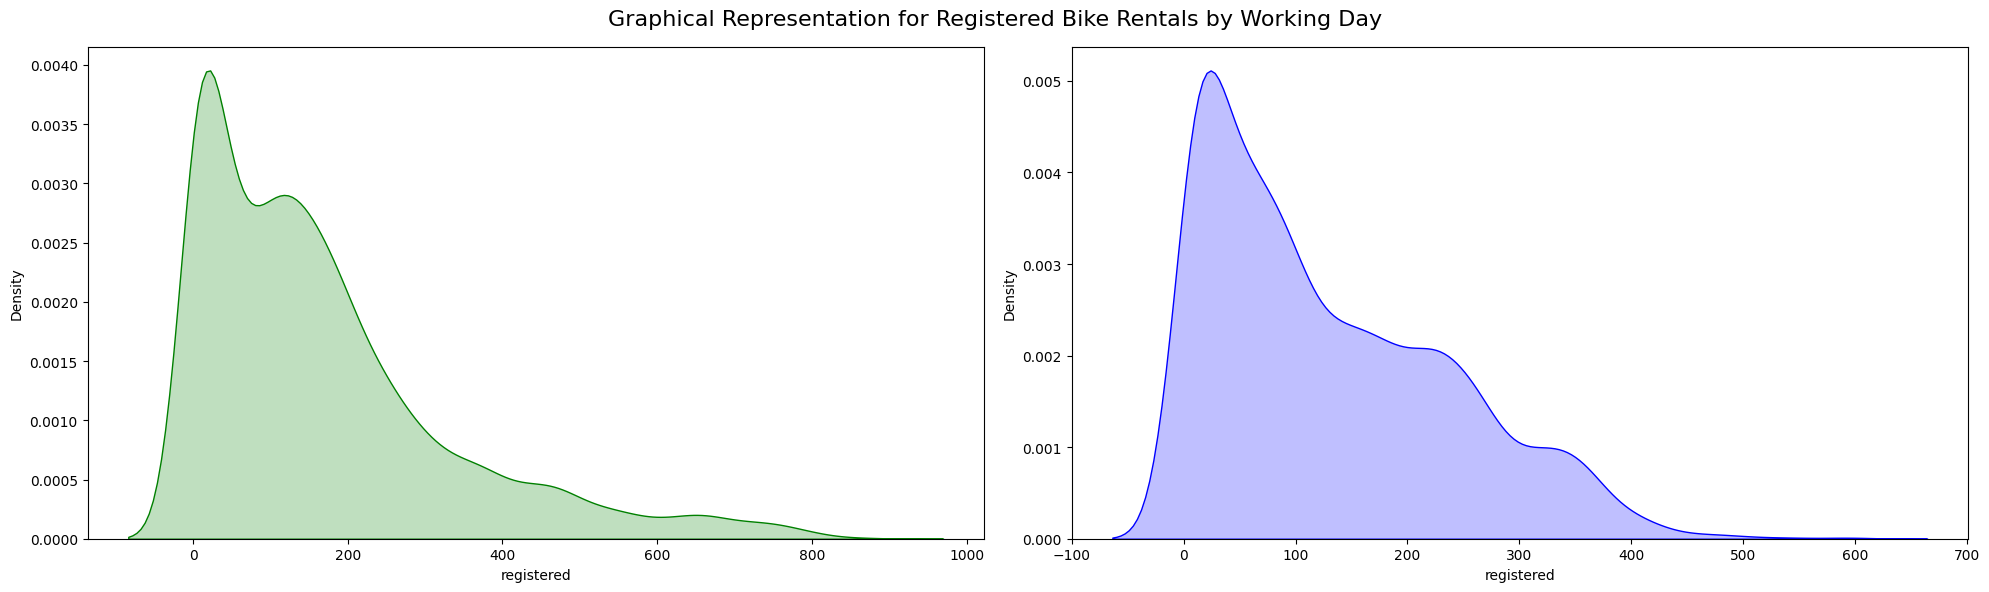

In [184]:
t1=data[data['workingday']==1]['registered']   #neither weekend nor holiday
t2=data[data['workingday']==0]['registered']   #weekend or holiday

stats,p=ttest_ind(t1,t2,alternative='greater')
print(f"T-Test: {stats,p}")

if p<0.05:
  print("Reject Null Hypothesis, Working and Non-Working Day has impact on Registered Bike Rentals")
else:
  print("Accept Null Hypothesis, Working Day and Non-Working has no impact on Registered Bike Rentals")

print("*"*250)
print("*"*250)

plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
sns.kdeplot(data=data,x=t1,shade=True,color='green')

plt.subplot(1,2,2)
sns.kdeplot(data=data,x=t2,shade=True,color='blue')

plt.suptitle('Graphical Representation for Registered Bike Rentals by Working Day', fontsize=16)
plt.tight_layout()
plt.show()

From above we see that registered users rent bikes more on working days instead of weekend or holiday

Both distributions are right-skewed, but the working‐day curve has a longer right tail (rentals occasionally exceed 600-800), indicating some very high‐usage days when people commute in droves.

The non-working‐day curve’s tail tapers off around 400–600 rentals—fewer extreme peaks.

The non-working-day density shows subtle bumps (suggesting a couple of “typical” leisure‐day rental levels), whereas the working-day curve is smoother and more concentrated around its main peak.

# Impact of Working Day on Casual Bike Rentals

Ho: Working Day has no impact on Casual Bike Rentals

Ha: Working Day has impact on Casual Bike Rentals

As data we work on is Numerical VS Categorical and how Registered Rentals dependent on each category- (weekday,weekend)

Alpha: 0.05

Test USed: T-Test Independence

T-Test: (np.float64(-35.12830185964087), np.float64(1.0))
Accept Null Hypothesis, Working Day and Non-Working has no impact on Casual Bike Rentals
**********************************************************************************************************************************************************************************************************************************************************
**********************************************************************************************************************************************************************************************************************************************************


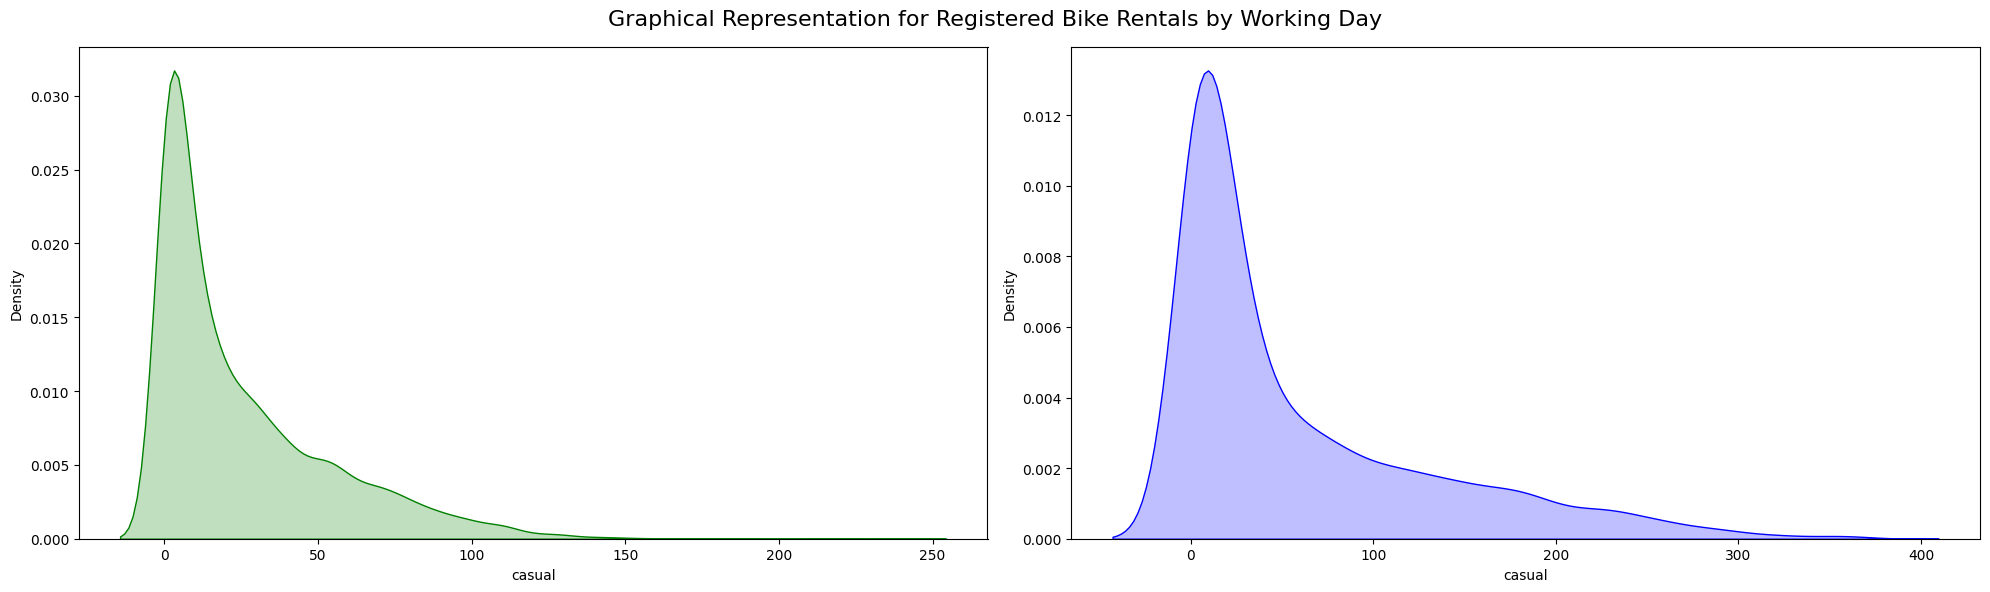

In [185]:
t1=data[data['workingday']==1]['casual']   #neither weekend nor holiday
t2=data[data['workingday']==0]['casual']   #weekend or holiday

stats,p=ttest_ind(t1,t2,alternative='greater')
print(f"T-Test: {stats,p}")

if p<0.05:
  print("Reject Null Hypothesis, Working and Non-Working Day has impact on Casual Bike Rentals")
else:
  print("Accept Null Hypothesis, Working Day and Non-Working has no impact on Casual Bike Rentals")
print("*"*250)
print("*"*250)


plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
sns.kdeplot(data=data,x=t1,shade=True,color='green')

plt.subplot(1,2,2)
sns.kdeplot(data=data,x=t2,shade=True,color='blue')

plt.suptitle('Graphical Representation for Registered Bike Rentals by Working Day', fontsize=16)
plt.tight_layout()
plt.show()

In [186]:
from scipy.stats import kurtosis

print(f"Kurtosis of working day: {kurtosis(t1)}")
print(f"Kurtosis of non-working day: {kurtosis(t2)}")

Kurtosis of working day: 2.415856151182414
Kurtosis of non-working day: 1.6255094533693368


As kurtosis of working day is greater than 0, its Leptokurtic which means it has sharper peak which we can see also. It has more outliers compare to non-working day

As kurosis of non-working day is less than 0, its platykurtic which means it has flatter peak. It has fewer extreme outliers.

From above we see that casual users rent bikes more on non-working days instead of weekend or holiday

Both distributions are right-skewed, but the non-working‐day curve has a longer right tail (rentals occasionally exceed 300), indicating some very high‐usage days when people commute in droves.

The working‐day curve’s tail tapers off around 100-150 rentals—fewer extreme peaks.


# Casual VS Registered Rentals are different or Not

Ho: There is no significant difference in casual and registered renatls

Ha: There is significant difference in casual and registered renatls

As data we work on is Numerical VS Numerical

Alpha: 0.05

Test Used: Paired T test

In [187]:
#Paired T-Test

stats,p=ttest_rel(data['casual'],data['registered'])
print(f"Paired T-Test: {stats,p}")

if p<0.05:
  print("Reject Null Hypothesis, There is significant difference in casual and registered renatls")
else:
  print("Accept Null Hypothesis, There is no significant difference in casual and registered renatls")

Paired T-Test: (np.float64(-93.46492376407102), np.float64(0.0))
Reject Null Hypothesis, There is significant difference in casual and registered renatls


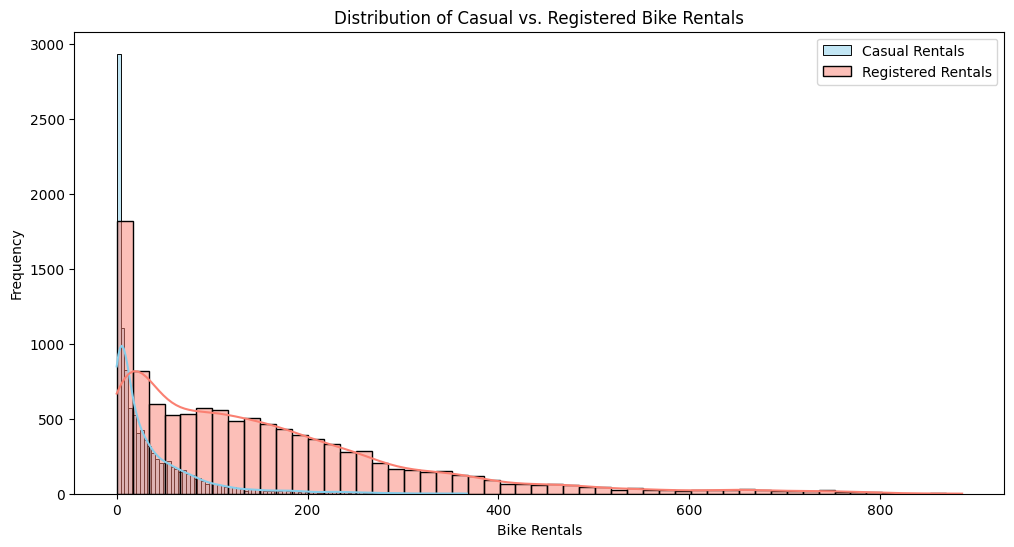

In [188]:
plt.figure(figsize=(12, 6))
sns.histplot(data['casual'], kde=True, label='Casual Rentals', color='skyblue')
sns.histplot(data['registered'], kde=True, label='Registered Rentals', color='salmon')
plt.title('Distribution of Casual vs. Registered Bike Rentals')
plt.xlabel('Bike Rentals')
plt.ylabel('Frequency')
plt.legend()

plt.show()

Registered users ride far more frequently than casual users on average (higher mode and mean).

Casual usage is low‐volume and bursty, with most days quiet and only rare spikes.

Both distributions are right‐skewed, but the magnitude and spread are much greater for registered riders.



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **INSIGHTS**

Working Day does not contribute to demand changes.

There appears to be increased number of casual users on weekends.

We can conclude that Weather and Season is a major contributor for changes in demand.

*   Clear weather has the highest demand.

*   Light rain or snow has the lowest demand.

*   Fall, Summer and Winter Season has the higher demand.

*   Spring Season has the lowest demand.  

Humidity is not a contributing factor for changes in demand.

Temperature is a major contributor for changes in demand.

As the temperature increases, the demand increases

Warm temperature(20-30 degrees Celsius) has the highest demand.

Wind speed is minor contributor for changes in demand.
  
*   Demand decreases as the wind speed rises beyond 21 kmph.

Bike rentals is affected by seasons. We can see that most of the count of users occurs in Fall season followed by Spring season.

We can also notice a relation between weather and bike rentals of total customers, we can see 1st category (Clear, Few clouds, partly cloudy, partly cloudy) followed by 2nd category (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist). We can see less count in 3rd Category of weather (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)

There is no impact of Holiday on bike rentals of Yulu. This is a really good point for any business to scale.

Temperature also affects the Bike rentals based on temperature of climate. We can see that count increases as temperature increases but till 40 degree celcius. Most of the users using Yulu bikes lies in range of 30 to 40 degree celcius.

We can see that Weather and Season has relation between themselves and so it affects the rental bikes by users.

Humidity in Air is also affects the count of users for using Yulu bikes. Humidity range 20 to 40 has good count of users and as Humidity increases the user count decreases.

Windspeed also has impact on bike rentals. We can see the plot which inferes that less windspeed more is the count of users and same vice versa.
The big factor which also does not impacts the buisness of Yulu is Working and Non-working days. We can see no impact of this factor and it is a positive direction for any business.





# **Business Recommendations**

**Weather-Based Strategies:**

- Focus marketing and promotions during periods of clear weather, particularly in the fall season, when demand is highest.

- Prepare for lower demand during periods of light rain or snow by adjusting inventory or offering incentives.

- Develop targeted campaigns for specific weather conditions, such as promotions during periods with mild misty conditions.

**Seasonal Promotions:**
- Implement seasonal promotions with different incentives in spring and winter when demand is typically lower.
- Focus on attracting new customers during the spring months where demand is relatively lower.

**Temperature-Sensitive Pricing or Promotions:**
- Implement dynamic pricing strategies based on temperature, with higher prices during peak temperature ranges (20-30°C) where demand is highest.
- Run promotions or discounts during cooler temperatures to stimulate demand.


**Wind Speed Considerations:**
- Monitor wind speed forecasts and adjust operations or provide warnings to users when wind speeds exceed 21 kmph.
- Offer incentives to users during periods of low wind speeds to encourage rentals.

**Customer Segmentation Strategies:**
- Develop separate strategies for casual and registered users. Registered users are significantly more active on working days, while casual users prefer weekends.

**Holiday Impact:**
- The analysis indicates that holidays do not have a significant impact on bike rentals. This presents an opportunity to leverage this insight for promotional activities or marketing strategies that might not depend on holiday periods.

**Continuous Monitoring:**
- Keep monitoring weather patterns, temperature, and wind speed regularly to make real-time adjustments to operations, marketing, and pricing strategies.

**Marketing Strategies:**
- Given that the demand is higher in the fall and summer, promotional campaigns can be tailored towards these seasons, targeting specific demographics and weather conditions.

**Inventory Management:**
- Adjust bike inventory levels based on seasonal and weather patterns. During peak demand periods, ensure sufficient bike availability, and potentially implement a reserve system for registered users.
